# Artificial Intelligence 2
**Assignment 3** <br/>
**Nicky Bayat**

In [0]:
# First we import required libraries and images
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import fftpack
from scipy import signal
import math

try:
  image_A = cv2.imread("A.jpg", cv2.IMREAD_GRAYSCALE)
  image_B = cv2.imread("B.jpg", cv2.IMREAD_GRAYSCALE)
  einsteinandwho = cv2.imread('einsteinandwho.png', cv2.IMREAD_GRAYSCALE) /255.
except:
    print("please upload images into notebook!")

# Gaussian Blur:
Gaussian Filter is a low pass filter. I will apply this filter to both image A and B and plot the result.

In [0]:
def dnorm(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.e ** (-np.power((x - mu) / sigma, 2) / 2)


def gaussian_kernel(size, sigma):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()
    return kernel_2D

# Define bluring functions
def gaussian_blur(img, sigma = 3, kernel_size = 5):
  # First create Gaussian kernel
  kernel = gaussian_kernel(kernel_size, sigma)
  # convolve
  img= signal.convolve2d(img, kernel, mode='same')
  
  return img


### Effect of adding blur using Gaussian Filter

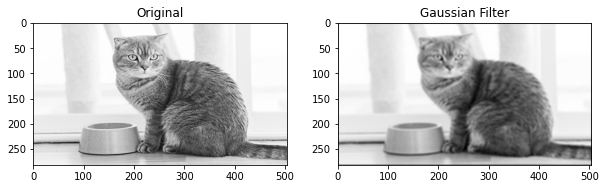

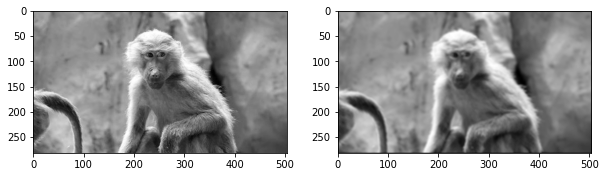

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(image_A, cmap=plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(gaussian_blur(image_A), cmap=plt.cm.gray)
axes[1].set_title("Gaussian Filter")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(image_B, cmap=plt.cm.gray)
axes[1].imshow(gaussian_blur(image_B), cmap=plt.cm.gray)

### Effect of increasing sigma in Gaussian Filter
Check out the curtain behind the cat! <br/>
> As we increase sigma, the output will be smoother with more bluring effect.




Text(0.5, 1.0, 'Guassian sigma = 10')

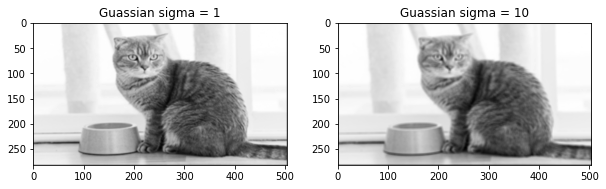

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(gaussian_blur(image_A,sigma=1), cmap=plt.cm.gray)
axes[0].set_title("Guassian sigma = 1")
axes[1].imshow(gaussian_blur(image_A,sigma=10), cmap=plt.cm.gray)
axes[1].set_title("Guassian sigma = 10")

### Effect of increasing kernel size in Gaussian Filter
As we increase kernel size, the output will be smoother with more bluring effect.

Text(0.5, 1.0, 'Guassian Kernel = 20')

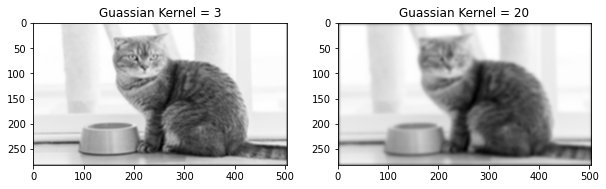

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(gaussian_blur(image_A,kernel_size=5), cmap=plt.cm.gray)
axes[0].set_title("Guassian Kernel = 3")
axes[1].imshow(gaussian_blur(image_A,kernel_size=20), cmap=plt.cm.gray)
axes[1].set_title("Guassian Kernel = 20")

# Box Blur:
Box blur is also known as box linear filter. Box blurs are frequently used to approximate Gaussian blur.

In [0]:
def sum_square(square): 
    tot_sum = 0
    size = len(square)
    for i in range(size): 
        for j in range(size): 
            tot_sum += square[i][j] 
              
    return tot_sum // np.power(size,2)

def Box_blur(image, kernel_size=3):
  square = []
  square_row = []
  blur_row = []
  blur_img = []
  n_rows = len(image) 
  n_col = len(image[0]) 
  rp, cp = 0, 0
  while rp <= n_rows - kernel_size:
    blur_row = []  
    while cp <= n_col-kernel_size:     
      square = []
      for i in range(rp, rp + kernel_size): 
        for j in range(cp, cp + kernel_size): 
          square_row.append(image[i][j]) 
        square.append(square_row) 
        square_row = []           
      blur_row.append(sum_square(square))              
      cp = cp + 1

    for i in range(kernel_size-1):
      blur_row.append(sum_square(square))
    blur_img.append(blur_row)  
    rp = rp + 1
    cp = 0

  for i in range(kernel_size-1):
    blur_img.append(blur_row)
      
  # Return the resulting pixel matrix 
  return blur_img 

Here is the result of applying box blur with kernel size = 3 on both images.

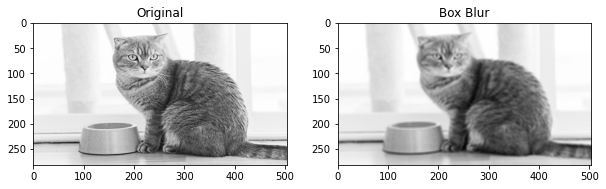

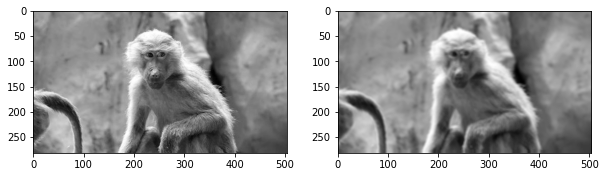

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(image_A, cmap=plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(Box_blur(image_A, kernel_size=5), cmap=plt.cm.gray)
axes[1].set_title("Box Blur")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(image_B, cmap=plt.cm.gray)
axes[1].imshow(Box_blur(image_B, kernel_size=5), cmap=plt.cm.gray)

Then I will plot the effect of increasing kernel size in box blur. As you can see, the image becomes blurier with increasing kernel size.

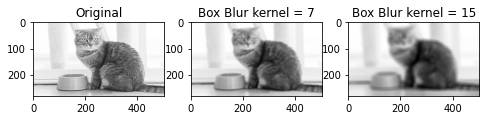

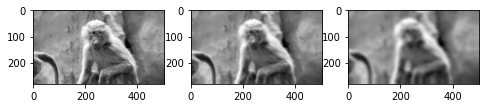

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes[0].imshow(image_A, cmap=plt.cm.gray)
axes[0].set_title("Original")
axes[1].imshow(Box_blur(image_A, kernel_size=7), cmap=plt.cm.gray)
axes[1].set_title("Box Blur kernel = 7")
axes[2].imshow(Box_blur(image_A, kernel_size=15), cmap=plt.cm.gray)
axes[2].set_title("Box Blur kernel = 15")


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
axes[0].imshow(image_B, cmap=plt.cm.gray)
axes[1].imshow(Box_blur(image_B, kernel_size=7), cmap=plt.cm.gray)
axes[2].imshow(Box_blur(image_B, kernel_size=15), cmap=plt.cm.gray)

# Hybrid Images
I will plot results of creating hybrid images using gaussian and box filters in this section. For sake of comparison, I picked kernel size = 5 for both filters.<br/>
As we increase sigma for gaussian filter, we pass higher frequencies in our low pass filter. This means the image corresponding to low pass frequency (far image) can be seen more clearly in the front and the other image corresponding to higher frequency (1-low pass) will have less frequency therefore is less visible in the front.

In [0]:
# Then we compute hybrid image using chosen blur function and parameters
def guassian_hybrid(imageA, imageB):
  hybrid_image = gaussian_blur(imageB, sigma=2, kernel_size=5) + (imageA - gaussian_blur(imageA, sigma=5, kernel_size=5))
  return hybrid_image

def box_hybrid(imageA, imageB):
  hybrid_image = Box_blur(imageB, kernel_size=5) + (imageA - Box_blur(imageA, kernel_size=5))
  return hybrid_image

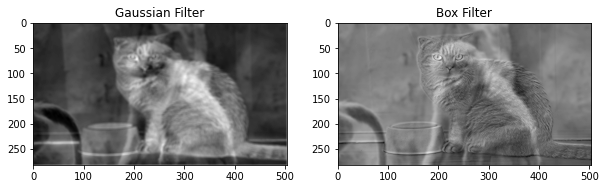

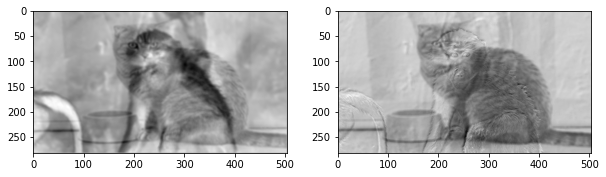

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(guassian_hybrid(image_A, image_B), cmap=plt.cm.gray)
axes[0].set_title("Gaussian Filter")
axes[1].imshow(box_hybrid(image_A, image_B), cmap=plt.cm.gray)
axes[1].set_title("Box Filter")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(guassian_hybrid(image_B, image_A), cmap=plt.cm.gray)
axes[1].imshow(box_hybrid(image_B, image_A), cmap=plt.cm.gray)

# Part 3 - De-hybridizing

By applying a low pass filter on the hybrid image we can extract low frequencies that correspond to the far image. Then we will subtract them from hybrid image to get the high frequencies related to einstein image.

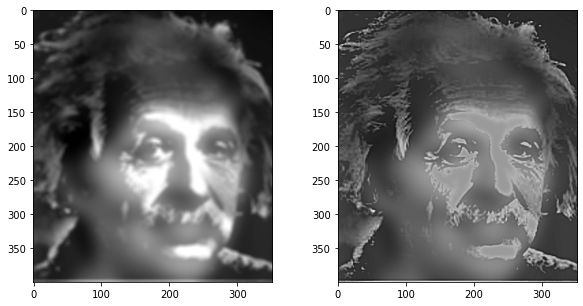

In [113]:
import cv2
# scale image's intensity to [0,1] with mean value of 0.5 for better visualization.
# scale an image's intensity from [min, max] to [0, 1].
def intensityscale(raw_img):
    # scale an image's intensity from [min, max] to [0, 1].
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img * 1.0 - v_min) / (v_max - v_min)
    # keep the mean to be 0.5.
    meangray = np.mean(scaled_im)
    scaled_im = scaled_im - meangray + 0.5
    # clip to [0, 1]\n",
    return np.clip(scaled_im, 0, 1)


im_scaled = intensityscale(einsteinandwho)
#plt.imshow(im_scaled, cmap=plt.cm.gray)


blur = cv2.GaussianBlur(einsteinandwho,(7,7),sigmaX=5, sigmaY=5) # low pass
einstein = im_scaled-blur  #high pass => einstein
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(blur, cmap=plt.cm.gray)
axes[1].imshow(einstein, cmap=plt.cm.gray)